In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно токсичных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных токсичных")

data = pd.read_csv("toxic_train.csv")

test_data = pd.read_csv("toxic_test.csv")


train_texts = np.array(data['comment_text'])
test_texts = np.array(test_data['comment_text'])

for enum in range(train_texts.__len__()):
    train_texts[enum] = train_texts[enum].lower()
    train_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', train_texts[enum])
    train_texts[enum] =  re.sub(' +', ' ', train_texts[enum])


    
test_texts = np.array(test_data['comment_text'])
for enum in range(test_texts.__len__()):
    test_texts[enum] = test_texts[enum].lower()
    test_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', test_texts[enum])
    test_texts[enum] =  re.sub(' +', ' ', test_texts[enum])


train_target = np.array(data['is_toxic']).astype(int) * 2 - 1 
test_target = np.array(test_data['is_toxic']).astype(int) * 2 - 1



In [3]:
def predict(X, w):

    ans = np.sign(X * w)
    ans[ans == 0] = 1
    return ans

In [27]:
data_system = ((train_matrix, train_target), (test_matrix, test_target))

In [7]:
from optimization import GDClassifier

In [28]:
def launch_GDC(data, step_alpha = 3.5, step_beta = 0, max_iter = 1000):
    classifier = GDClassifier(step_alpha, step_beta, max_iter, l2_coef = 0)
    holder = classifier.fit(data[0][0], data[0][1], trace = True)
    res = classifier.predict(data[1][0])
    return holder, res

#### Выведем работу с BagOfWords(CountVectorizer)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vect = CountVectorizer(min_df=20, stop_words='english')

In [81]:
train_matrix = vect.fit_transform(train_texts)
test_matrix = vect.transform(test_texts)

In [8]:
classifier = GDClassifier(step_alpha = 3.4, step_beta = 0, l2_coef = 0)

In [9]:
classifier.fit(train_matrix, train_target)

In [10]:
accuracy_score(test_target, classifier.predict(test_matrix))

0.8668988198877926

#### Рассмотрим теперть алгоритм tf-idf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tf_vect = TfidfVectorizer(min_df = 20, stop_words = 'english')

In [13]:
train_tf= tf_vect.fit_transform(train_texts)

In [14]:
test_tf = tf_vect.transform(test_texts)

In [21]:
classifier = GDClassifier(step_alpha = 3.4, step_beta = 0, l2_coef = 0)

In [22]:
classifier.fit(train_tf, train_target)

In [23]:
accuracy_score(test_target, classifier.predict(test_tf))

0.8752660088992068

In [83]:
res_cv = []
res_tv = []
for i in range(1,11):
    classifier = GDClassifier(step_alpha = i * 0.5, step_beta = 0, l2_coef = 0)
    classifier.fit(train_matrix, train_target)
    res_cv.append(classifier.predict(test_matrix))
    
    classifier.fit(train_tf, train_target)
    res_tv.append(classifier.predict(test_tf))

In [84]:
acc_cv = [accuracy_score(test_target, res) for res in res_cv]
acc_tv = [accuracy_score(test_target, res) for res in res_tv]

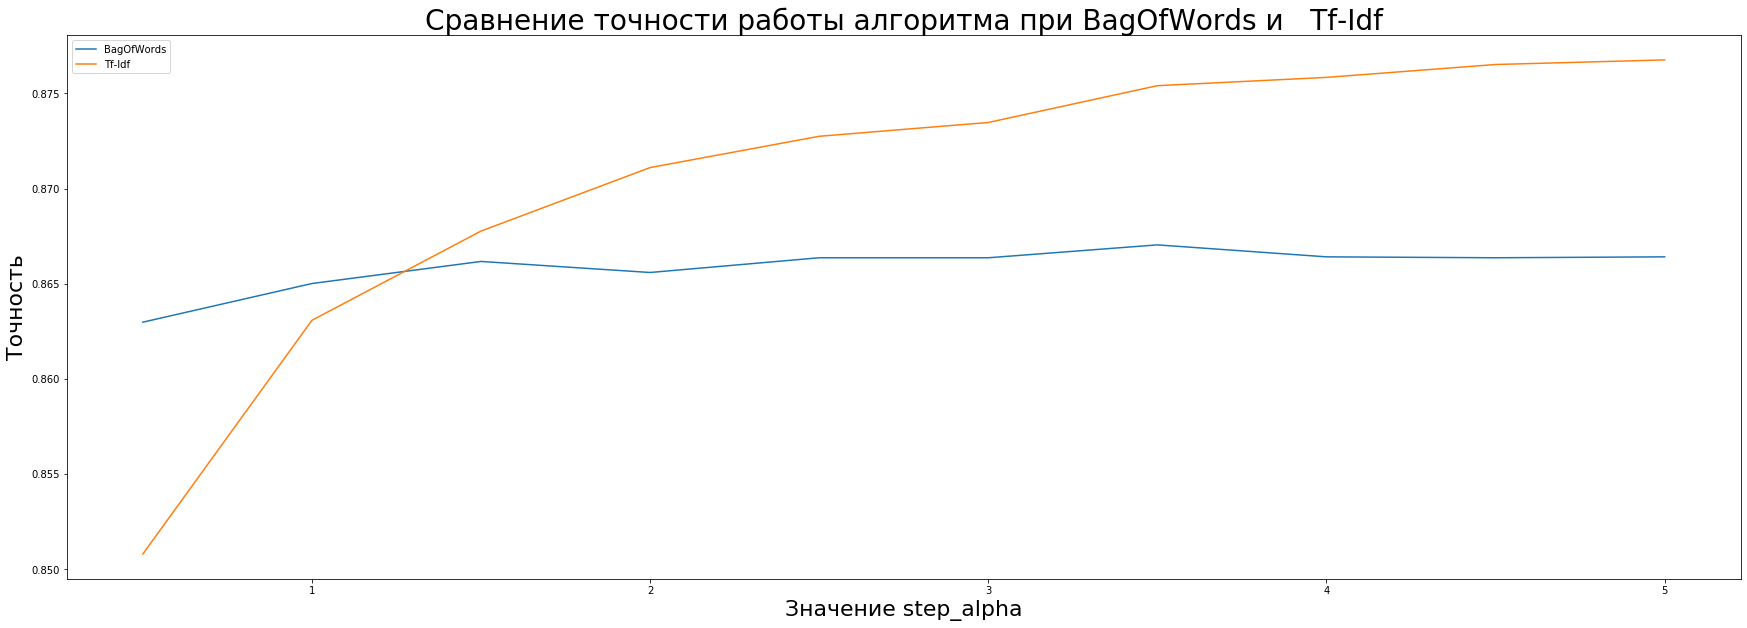

In [95]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 11) * 0.5, acc_cv, label = "BagOfWords")
plt.plot(np.arange(1, 11) * 0.5, acc_tv, label = "Tf-Idf")
plt.legend()
plt.title("Сравнение точности работы алгоритма при BagOfWords и   Tf-Idf", fontsize=28)
plt.xlabel("Значение step_alpha", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/TF-IDF-Bag.png")

plt.show()

Результат стал лучше на аналогичных входных параметрах, попробуем оптимизировать для данного способа векторизации по step_alpha

In [ ]:
res_a = []
hold_a = []

In [41]:
for i in range(101, 111):
    classifier = GDClassifier(step_alpha = i / 10, step_beta = 0, l2_coef = 0)
    hold_a.append(classifier.fit(train_tf, train_target, trace = True))
    res_a.append(classifier.predict(test_tf))

In [42]:
acc_a = [accuracy_score(test_target, res) for res in res_a]

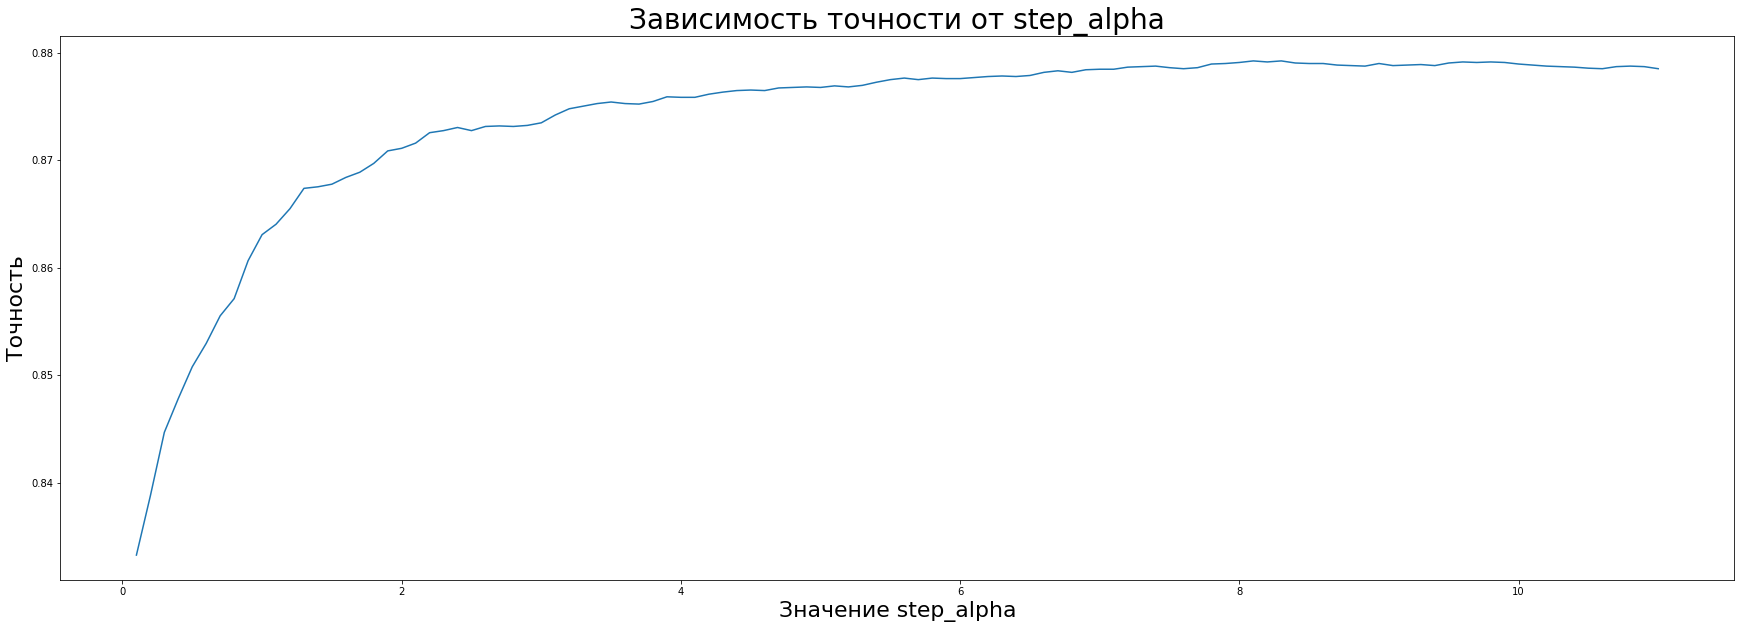

In [96]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 111) * 0.1, acc_a)
plt.title("Зависимость точности от step_alpha", fontsize=28)
plt.xlabel("Значение step_alpha", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/tfidf_acc_alpha.png")

plt.show()

In [45]:
max(acc_a), np.argmax(acc_a) # значит  8.1

(0.8792319597601084, 80)

In [46]:
import treetaggerwrapper as ttpw
tagger = ttpw.TreeTagger(TAGLANG='en', TAGDIR='tagger')
tags = tagger.tag_text(train_texts[0])
lemmas = " ".join([t.split('\t')[-1] for t in tags])

/usr/local/lib/python3.7/site-packages/treetaggerwrapper.py:740: FutureWarning: Possible nested set at position 8
  re.IGNORECASE | re.VERBOSE)
/usr/local/lib/python3.7/site-packages/treetaggerwrapper.py:2044: FutureWarning: Possible nested set at position 152
  re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.7/site-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.7/site-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


In [47]:
train_tagger = [" ".join([t.split('\t')[-1] for t in tagger.tag_text(item)]) for item in train_texts]

In [48]:
test_tagger = [" ".join([t.split('\t')[-1] for t in tagger.tag_text(item)]) for item in test_texts]

In [50]:
train_tag_tf = tf_vect.fit_transform(train_tagger)

In [51]:
test_tag_tf = tf_vect.transform(test_tagger)

In [52]:
classifier = GDClassifier(step_alpha = 8.1, l2_coef = 0)

In [53]:
classifier.fit(train_tag_tf, train_target)

In [54]:
res = classifier.predict(test_tag_tf)

In [55]:
accuracy_score(test_target, res)

0.881408396208164

In [58]:
w_tagger = []
res_tagger = []

w = np.zeros(train_tag_tf.shape[1])

for i in range(200):
    classifier = GDClassifier(step_alpha = 3.5, step_beta = 0, max_iter = 100, l2_coef = 0)
    classifier.fit(train_tag_tf,train_target, w_0 = w)
    
    w_tagger.append(w)
    res_tagger.append(classifier.predict(test_tag_tf))
    w = classifier.get_weights()

In [60]:
acc_tagger = [accuracy_score(test_target, item) for item in res_tagger]

In [61]:
np.argmax(acc_tagger)

104

In [62]:
check_metrics(test_target, res_tagger[np.argmax(acc_tagger)])

Accuracy:  0.8835848326562198
Roc_Auc:  0.8862561945496188
Precision:  0.7622368061252393  - процент правильно токсичных
Recall:  0.893000160179401  - процент выбранных токсичных


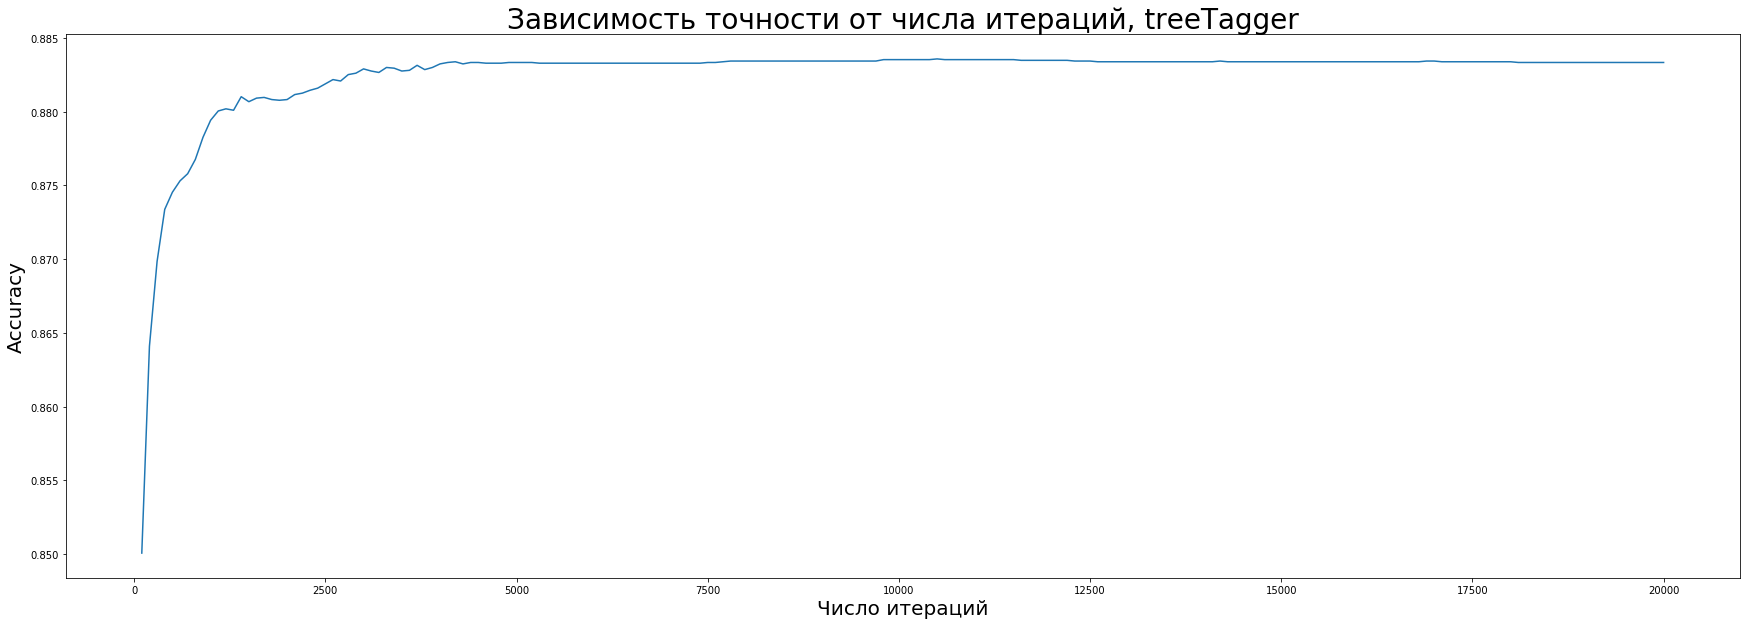

In [80]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1,201) * 100, acc_tagger)
plt.title("Зависимость точности от числа итераций, treeTagger", fontsize=28)
plt.xlabel("Число итераций", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)

plt.savefig("Images/tfidf_treetagger.png")

plt.show()



In [63]:
import spacy

spacy.util.set_data_path("/usr/local/lib/python3.7/site-packages/spacy/data")

In [64]:
nlp = spacy.load("en", disable = ["parser", "ner"])

В качестве примера возьмем первый элемент тренировочной выборки:

In [65]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

Пример работы на не модифицированных входных данных

In [66]:
doc = nlp(data['comment_text'][0])

" ".join([token.lemma_ for token in doc])

'explanation \n why the edit make under -PRON- username Hardcore Metallica Fan be revert ? -PRON- be not vandalism , just closure on some gas after -PRON- vote at New York Dolls FAC . and please do not remove the template from the talk page since -PRON- be retire now.89.205.38.27'

На модифицированных входных данных:

In [67]:
doc = nlp(train_texts[0])

" ".join([token.lemma_ for token in doc])

'explanation why the edit make under -PRON- username hardcore metallica fan be revert -PRON- weren t vandalism just closure on some gas after i vote at new york doll fac and please don t remove the template from the talk page since i m retire now 89 205 38 27'

Применим ко всей выборке:

In [68]:
result = []

for item in train_texts:
    
    doc = nlp(item)
    
    result.append(" ".join([token.lemma_ for token in doc]))

In [69]:
test_result = []

for item in test_texts:
    
    doc = nlp(item)
    
    test_result.append(" ".join([token.lemma_ for token in doc]))

In [72]:
train_matrix = tf_vect.fit_transform(result)
test_matrix = tf_vect.transform(test_result)

In [73]:
w_list = []
res_list = []

w = np.zeros(test_matrix.shape[1])

for i in range(200):
    
    classifier = GDClassifier(step_alpha = 3.4, step_beta = 0, l2_coef = 0, max_iter = 100)
    classifier.fit(train_matrix, train_target, w_0 = w)
    
    w_list.append(w)
    w = classifier.get_weights()
    
    res_list.append(classifier.predict(test_matrix))

In [74]:
accuracy = [accuracy_score(test_target, val) for val in res_list]

In [75]:
np.max(accuracy)

0.8818436834977752

In [76]:
check_metrics(test_target, res_list[181])

Accuracy:  0.8818436834977752
Roc_Auc:  0.883554752805162
Precision:  0.7607740872906945  - процент правильно токсичных
Recall:  0.8878744193496716  - процент выбранных токсичных


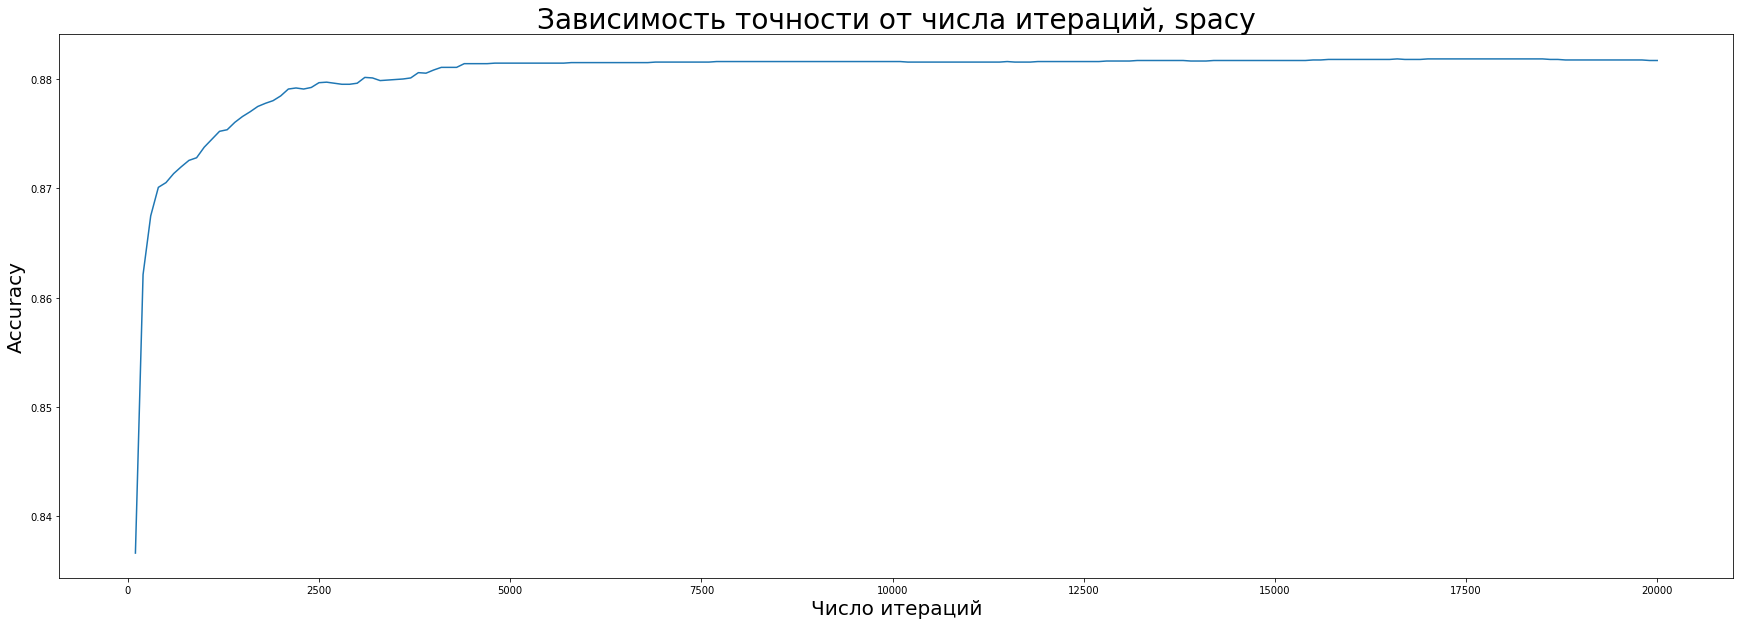

In [79]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1,201) * 100, accuracy)
plt.title("Зависимость точности от числа итераций, spacy", fontsize=28)
plt.xlabel("Число итераций", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)

plt.savefig("Images/tfidf_spacy.png")

plt.show()